<a href="https://colab.research.google.com/github/vijya2004/REGRESSION-ANALYSIS-4/blob/main/pca%3Ddemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'digit-recognizer:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F3004%2F861823%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240425%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240425T190920Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D468cf7da5b5fd63b143e40154c8d4e9109742296ac2fee1b6ae7ee6ba0c658f7446b2393ad6318e2b9264916d82049747f83cbc987af096872814576e871cd108b1f31841bd9e638895f8ec440d0cc6f4f33a058a8b36f20e355ece5c7c4ddef7f154ba61d71d8d66c49f0a76cc7dd16ecb1645b7b88750f541e1272663541ba6110ab6d1729afd672ae5591e7566f648f0bd63844e0a48a1f720ae37bd43feabc9013da018125e9823462602c9fff8509354abfba18f47eb72e8c422813c916feacb971aedbbbdd86929d19ead6d04e1f019a3a508d077266ae01bc4632a00096170f95737ae961f0b9b559ff142d92ad8d466eff64ca3691bd9480d467a460'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [ ]:
df= pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [ ]:
df.shape

(42000, 785)

In [ ]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
13189,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import matplotlib.pyplot as plt

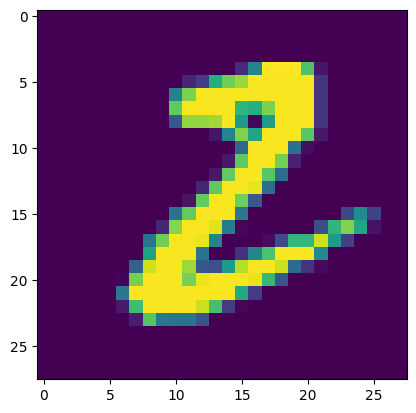

In [ ]:
plt.imshow(df.iloc[13189,1:].values.reshape(28,28))

In [ ]:
x= df.iloc[:,1:]
y=df.iloc[:,0]

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape

(33600, 784)

In [ ]:
x_test.shape

(8400, 784)

In [ ]:
y_train.shape

(33600,)

In [ ]:
y_test.shape

(8400,)

In [ ]:
#following knn to get the spacific match of the give image
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
# thrown this algorithum we are checking the distance of the matched value
import time
start=time.time()
y_pred = knn.predict(x_test)
print(time.time() -start)

12.119139909744263


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [ ]:
#first we preprocess our data
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
#pca
from sklearn.decomposition import PCA
pca = PCA(n_components=None)

In [ ]:
#here we not give the component so we get all the columns but i fwe give the components so we get the spacific no. of columns.
x_train=pca.fit_transform(x_train)
x_test= pca.transform(x_test)

In [ ]:
x_train.shape

(33600, 784)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)

In [ ]:
x_train_trf=pca.fit_transform(x_train)
x_test_trf= pca.transform(x_test)

In [ ]:
x_train_trf.shape


(33600, 100)

In [ ]:
knn =KNeighborsClassifier()

In [ ]:
knn.fit(x_train_trf,y_train)

KNeighborsClassifier()

In [ ]:
y_pred =knn.predict(x_test_trf)

In [ ]:
accuracy_score(y_test,y_pred)

0.9536904761904762

In [ ]:
#creating the loopt o check the accuracy for each point
for i in range(1,785):
    pca = PCA(n_components=i)
    x_train_trf=pca.fit_transform(x_train)
    x_test_trf= pca.transform(x_test)

    knn =KNeighborsClassifier()

    knn.fit(x_train_trf,y_train)

    y_pred =knn.predict(x_test_trf)

    print(accuracy_score(y_test,y_pred))


0.2575
0.32392857142857145
0.5103571428571428
0.6663095238095238
0.7376190476190476
0.8221428571428572
0.8429761904761904
0.8722619047619048
0.8869047619047619
0.9046428571428572
0.9119047619047619
0.9185714285714286
0.9278571428571428
0.9354761904761905
0.9388095238095238
0.9383333333333334
0.9401190476190476
0.9402380952380952
0.9428571428571428
0.944047619047619
0.9434523809523809
0.9444047619047619
0.9451190476190476
0.945
0.9478571428571428
0.9484523809523809
0.9469047619047619
0.9471428571428572
0.9483333333333334
0.9498809523809524
0.9502380952380952
0.9507142857142857
0.9495238095238095
0.95
0.9513095238095238
0.9511904761904761
0.9522619047619048
0.9527380952380953
0.9530952380952381
0.9519047619047619
0.9528571428571428
0.9528571428571428
0.9527380952380953
0.9545238095238096
0.9538095238095238
0.9533333333333334
0.9535714285714286
0.9541666666666667
0.9536904761904762
0.9542857142857143
0.9539285714285715
0.9535714285714286


KeyboardInterrupt: 

In [ ]:
#know we are visulaizing the data
# in  2d
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_train_trf= pca.fit_transform(x_train)
x_test_trf= pca.transform(x_test)

In [ ]:
x_train_trf

array([[-2.71868507, -0.48944929],
       [-0.67692638, -6.75386811],
       [-3.03326584,  6.50974347],
       ...,
       [ 2.14884495,  0.78094558],
       [ 1.05948746,  0.94836582],
       [17.70247044,  1.96248854]])

In [ ]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig =px.scatter( x=x_train_trf[:,0],
               y=x_train_trf[:,1],
               color=y_train_trf,
               color_discrete_sequence =px.colors.qualitative.G10
               )
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
x_train_trf= pca.fit_transform(x_train)
x_test_trf= pca.transform(x_test)

In [ ]:
x_train_trf

array([[-2.7186291 , -0.48956186,  1.13551694],
       [-0.67695581, -6.75272663, -2.33565576],
       [-3.0332386 ,  6.50931192,  7.4918187 ],
       ...,
       [ 2.14884258,  0.78113609, -0.74770995],
       [ 1.05958427,  0.94827856,  3.94953312],
       [17.70262937,  1.96310141, -4.94353526]])

In [ ]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig =px.scatter_3d( x=x_train_trf[:,0],
               y=x_train_trf[:,1],
                z=x_train_trf[:,2],
               color=y_train_trf)
fig.update_layout(
                    margin = dict(l=20, r=20 ,t=20 ,b=20)
)

fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [ ]:
pca.explained_variance_
#eigen_values

array([40.67111198, 29.17023345, 26.74459616])

In [ ]:
pca.components_.shape
#eigen_vectors

(3, 784)

In [ ]:
#checking that how much an individual eigen value affect the data to reach at 90 % of accuracy
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

In [ ]:

pca = PCA(n_components=None)
x_train_trf= pca.fit_transform(x_train)
x_test_trf= pca.transform(x_test)

In [ ]:
pca.explained_variance_.shape

(784,)

In [ ]:
#here we have 784 vectors in 784 spaces.
pca.components_.shape

(784, 784)

In [ ]:
pca.explained_variance_ratio_

array([5.78519225e-02, 4.14926968e-02, 3.80423901e-02, 2.96626277e-02,
       2.58156168e-02, 2.25498018e-02, 1.97306802e-02, 1.77527998e-02,
       1.56865066e-02, 1.43606328e-02, 1.37025484e-02, 1.22725500e-02,
       1.14691200e-02, 1.12302739e-02, 1.05852885e-02, 1.01993106e-02,
       9.57676152e-03, 9.42708817e-03, 9.12489429e-03, 8.90170190e-03,
       8.39940495e-03, 8.20063196e-03, 7.85303229e-03, 7.56739707e-03,
       7.37261022e-03, 7.01884653e-03, 6.97919728e-03, 6.71104483e-03,
       6.39845030e-03, 6.30337291e-03, 6.15350848e-03, 6.02388659e-03,
       5.83673972e-03, 5.78547759e-03, 5.72333148e-03, 5.46399774e-03,
       5.43207369e-03, 5.28172755e-03, 5.13381744e-03, 4.94015474e-03,
       4.87671103e-03, 4.81978768e-03, 4.68204430e-03, 4.59342487e-03,
       4.57660834e-03, 4.49219022e-03, 4.44682221e-03, 4.41540749e-03,
       4.35111936e-03, 4.32032928e-03, 4.21808870e-03, 4.18243127e-03,
       4.07994349e-03, 4.02004913e-03, 3.98335855e-03, 3.94598812e-03,
      

In [ ]:
# with this we see the sum of previous vector to the next vector
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

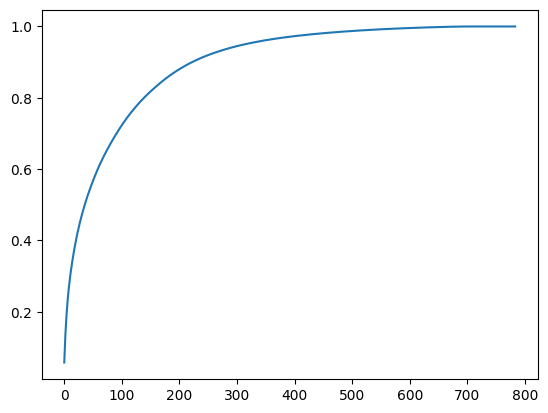

In [ ]:
#with this graph we get how much of component we needed.
plt.plot(np.cumsum(pca.explained_variance_ratio_))